<a href="https://colab.research.google.com/github/Swap02-droid/tensorflow-deep-learning/blob/main/01_neural_networks_regression_with_tensorflow_swap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction of regressoin with Neual Networks in TensorFlow

There are many definations of regression problem but in our case, we're going to simplify it: predicting a numerical veriable based on some other combination of variables, even shorter... predicting a number

In [ ]:
# Importing tensorflow

import tensorflow as tf
print(tf.__version__)

2.15.0


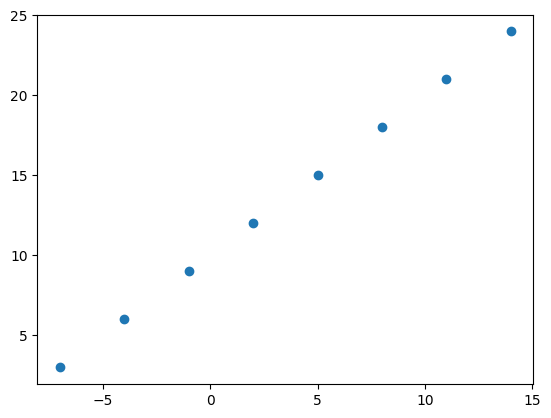

In [ ]:
## Create a data to view and fit

import numpy as np
import matplotlib.pyplot as plt

# Create a features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create a labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y)

In [ ]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shape

In [ ]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
## lets truns numpy array into tensors
x = tf.cast(tf.constant(x), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = x[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modeling with tensorflow

1. **Creating a model** - define a input and output layers, as well as the hidden layers of deep learnig model.
2. **Compilling a model** - define a loss function(in other words, the function which tell our model how wrong it is) and the optimizer (tells our model to how it can improve the patterns its learning). and evalutions matrix (what we can use to interpret the performance of our model).
3. **Fitting the model** - letting the model try to find patterns between x and y (feature and label).

In [ ]:
## Set random seed
tf.random.set_seed(42)

# 1. Create a model using sequential API
model = tf.keras.Sequential([
     tf.keras.layers.Input(shape=(1,)),
     tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # mae stands for mean absulate error
              optimizer=tf.keras.optimizers.SGD(),  # SGD stands for Short Gradient descent.
              metrics=["mae"])

# 3. Fit the model
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 441ms/step - loss: 15.0930 - mae: 15.0930
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 14.8707 - mae: 14.8707
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 14.7382 - mae: 14.7382
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 14.6057 - mae: 14.6057
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 14.4732 - mae: 14.4732


In [ ]:
# check out x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 96ms/step


array([[-4.2667537]], dtype=float32)

If we see here out model is predicting wrong output, for that we need to improve hidden layers

Lets create another model with updated hidden layers

In [ ]:
# 1. Create a model using sequebtial API
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 354ms/step - loss: 17.8934 - mae: 17.8934
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 17.6122 - mae: 17.6122
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 17.3309 - mae: 17.3309
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 17.0497 - mae: 17.0497
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 16.7684 - mae: 16.7684
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 16.4872 - mae: 16.4872
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 16.2059 - mae: 16.2059
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 15.9247 - mae: 15.9247
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 15.6434 - mae: 15.6434
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 15.3622 - mae: 15.3622
Epoch 11/100
1/1 [==============================] -

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 142ms/step


array([[29.76262]], dtype=float32)

### lets create one more model with some change

In [ ]:
# 1. Crete a model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
)

# 3. Fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 788ms/step - loss: 13.3841 - mae: 13.3841
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.7610 - mae: 12.7610
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1373 - mae: 12.1373
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 11.5116 - mae: 11.5116
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 10.8814 - mae: 10.8814
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.2432 - mae: 10.2432
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 9.5932 - mae: 9.5932
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 8.9276 - mae: 8.9276
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 8.2431 - mae: 8.2431
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.5369 - mae: 7.5369
Epoch 11/100
1/1 [==============================] - 0s 1

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 65ms/step


array([[26.626482]], dtype=float32)

### Evaluting Model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

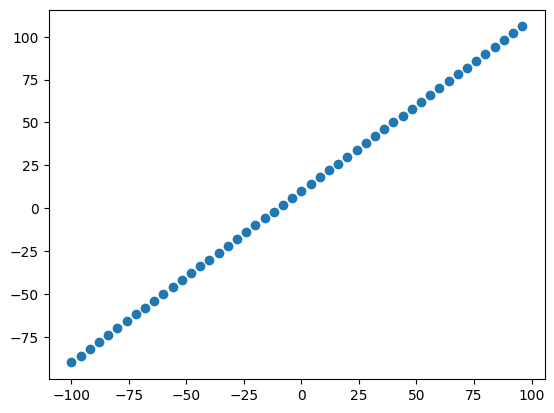

In [ ]:
plt.scatter(x, y)

In [ ]:
len(x)

50

In [ ]:
x_train = x[:40]
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]

x_train, y_train, x_test, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

### Visualing of data

Now we've got out data in taining and test set, let's visualise it

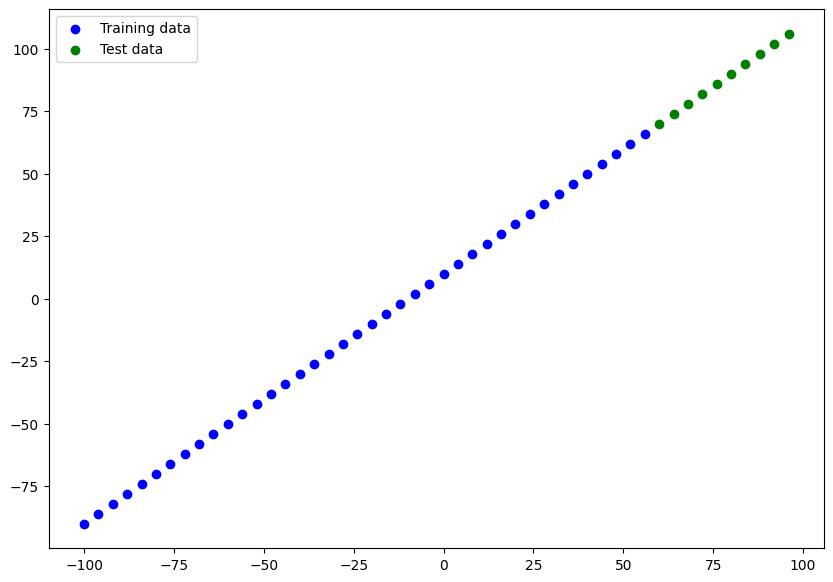

In [ ]:
plt.figure(figsize = (10, 7))
# plt training data set in blue
plt.scatter(x_train, y_train, c="b", label="Training data")

# plt test data set in green
plt.scatter(x_test, y_test, c="g", label="Test data")
plt.legend();

In [ ]:
# Let's have to look how to build a nerual network model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# # Fit a model
# model.fit(x_train, y_train, epochs=100)


In [ ]:
# model.summary()

### Visualizing the model


In [ ]:
## lets create a auto build model


# 1. Create a model
model = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer"),
    tf.keras.layers.Dense(1,  name="Output_layer")

])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total Param :- total number of parameters in the model
* Trainable params :- these are the parameters (patterns) model can update as it train
* Non Trainable params :- these parameters aren't update during training (this is typically when you bring in already learned patterns or parameters from another models during transfer learning)

In [ ]:
# lets fit the model
model.fit(x_train, y_train, epochs=100, verbose=1)


Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 43.8191 - mae: 43.8191
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 33.0971 - mae: 33.0971
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 37.4686 - mae: 37.4686
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 26.6396 - mae: 26.6396
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 14.5977 - mae: 14.5977
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.6583 - mae: 11.6583
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.7350 - mae: 12.7350
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 11.0826 - mae: 11.0826
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 40.1031 - mae: 40.1031
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.5435 - mae: 27.5435
Epoch 11/100
2/2 [==============================] - 0s 7m

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


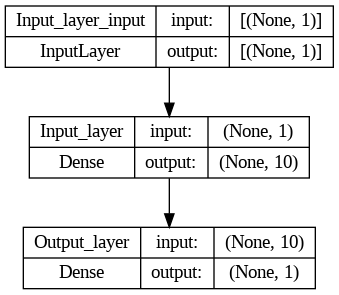

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [ ]:
# Make some predictions
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 54ms/step


array([[ 90.81206 ],
       [ 96.74365 ],
       [102.67527 ],
       [108.60687 ],
       [114.53847 ],
       [120.470085],
       [126.40168 ],
       [132.33328 ],
       [138.26488 ],
       [144.1965  ]], dtype=float32)

In [ ]:
x_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

##### here if you compire y_pred and x_test then you realise our model is able to predict very well, so lets build one more model with good accuracy

In [ ]:
# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(70, input_shape=[1], activation=None, name="Input_layer"),
    tf.keras.layers.Dense(1, name="Output_layer")
])

# 2. Lets compile model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics= ["mae"])

model_1.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 36.7333 - mae: 36.7333
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 18.9182 - mae: 18.9182
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6058 - mae: 8.6058
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 12.9173 - mae: 12.9173
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 13.9445 - mae: 13.9445
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 12.9313 - mae: 12.9313
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 10.5600 - mae: 10.5600
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 7.8717 - mae: 7.8717
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 8.7991 - mae: 8.7991
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 7.3670 - mae: 7.3670
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - 

In [ ]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 70)                140       
                                                                 
 Output_layer (Dense)        (None, 1)                 71        
                                                                 
Total params: 211 (844.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred = model_1.predict(x_test)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[ 71.92019 ],
       [ 76.044876],
       [ 80.16956 ],
       [ 84.29426 ],
       [ 88.418976],
       [ 92.54366 ],
       [ 96.66835 ],
       [100.79304 ],
       [104.91774 ],
       [109.04243 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

### Visualise the model predictions



In [ ]:
## Make some functoins for visualise model prediction
"""
plt.figure(figsize = (10, 7))
# plt training data set in blue
plt.scatter(x_train, y_train, c="b", label="Training data")

# plt test data set in green
plt.scatter(x_test, y_test, c="g", label="Test data")
plt.legend();
"""
def plot_prediction(train_data=x_train,
                    train_labels=y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    predictions=y_pred):
  plt.figure(figsize= (10, 7))

  # plt training data set in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # plt test data set in gree
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # plt predictoin data set in red
  plt.scatter(test_data, predictions, c="r", label="prediction")

  # plt legesd
  plt.legend();


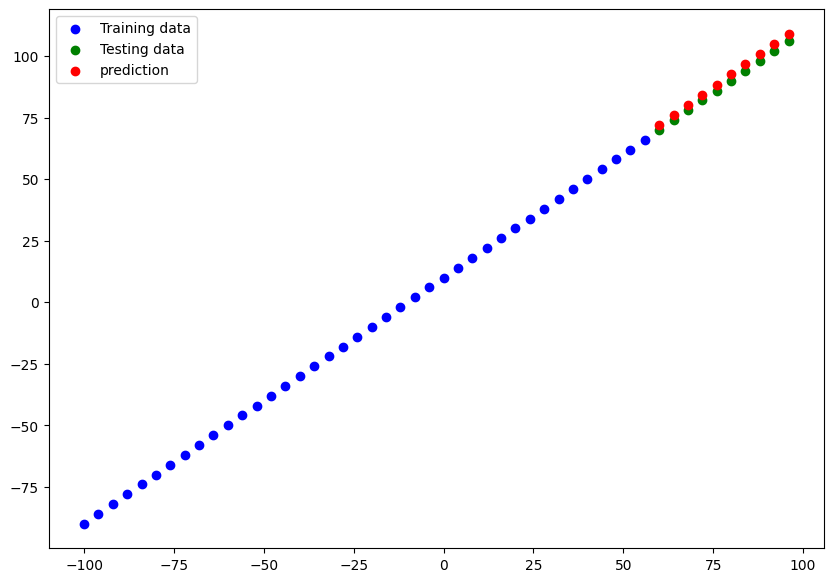

In [ ]:
plot_prediction()

In [ ]:
y_pred

array([[ 71.92019 ],
       [ 76.044876],
       [ 80.16956 ],
       [ 84.29426 ],
       [ 88.418976],
       [ 92.54366 ],
       [ 96.66835 ],
       [100.79304 ],
       [104.91774 ],
       [109.04243 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.481308>

In [ ]:
x_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

### Letes create one more model to compare with old one model which is `model`

* lets add 3 hidden layers, and train for 100 epoch

In [ ]:
# set a random seed
tf.random.set_seed(42) ## 42 is univesal value

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], activation="relu", name="Input_layer_1"),
    tf.keras.layers.Dense(70, activation=None, name="Input_layer_2"),
    tf.keras.layers.Dense(1, name="Output_layer_1")
])

# 2. compile a model
model_2.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics= ["mae"])

# fit the model
model_2.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
y_pred_2 = model_2.predict(x_test)
y_pred_2

1/1 [==============================] - 0s 61ms/step


array([[ 69.49466 ],
       [ 73.4501  ],
       [ 77.40555 ],
       [ 81.361   ],
       [ 85.316444],
       [ 89.271904],
       [ 93.22747 ],
       [ 97.183014],
       [101.138565],
       [105.094124]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

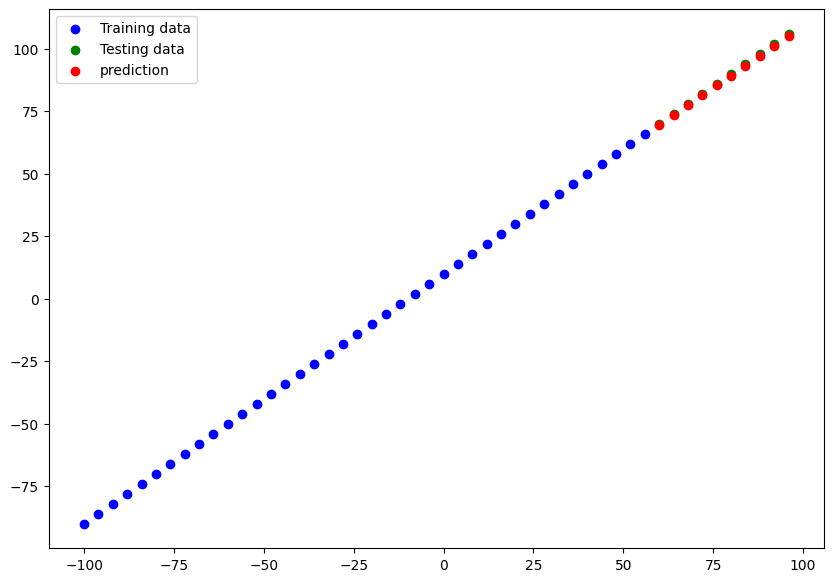

In [ ]:
plot_prediction(predictions=y_pred_2)

### If interviewere ask you to build a model



In [ ]:
# lets create a data
x_inter = tf.range(-200, 200, 3)
y_inter = x_inter+10
len(x_inter), len(y_inter)

(134, 134)

In [ ]:
# now creating a training and testing data for model
x_train_inter = x_inter[:110]
y_train_inter = y_inter[:110]
# len(y_train)

x_test_inter = x_inter[110:]
y_test_inter = y_inter[110:]

# len(x_train), len(y_train), len(x_test), len(y_test)

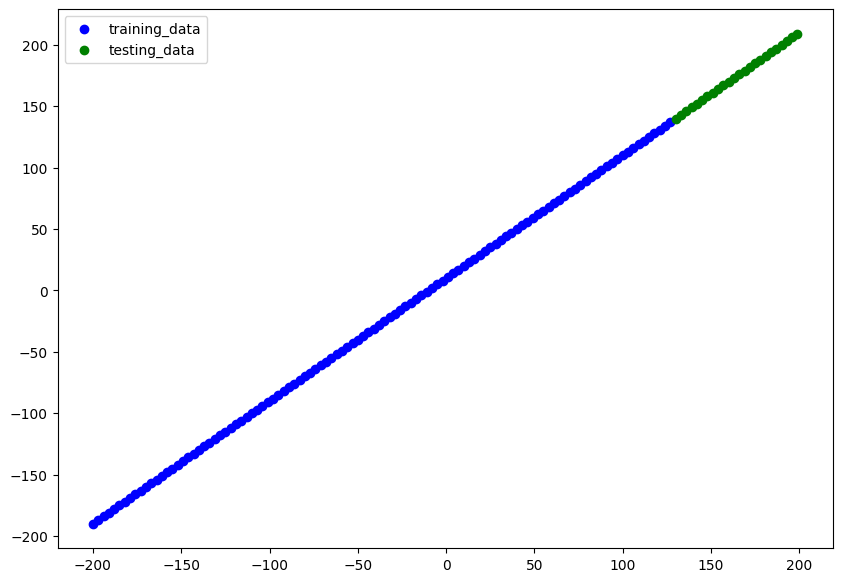

In [ ]:
# visualise a main data, then will compare train and test data
# plt.scatter(x, y)
plt.figure(figsize=(10, 7))
plt.scatter(x_train_inter, y_train_inter, c="b", label="training_data")
plt.scatter(x_test_inter, y_test_inter, c="g", label="testing_data")
plt.legend();

In [ ]:
# Now lets create a model

# 1. Create a model
model_demo = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], activation="relu", name="Input_layer"),
    # tf.keras.layers.Dense(70, input_shape=[1], activation="relu", name="Input_layer_2"),
    tf.keras.layers.Dense(1, input_shape=[1], name="Output_layers")
])

# 2. compile the model
model_demo.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   metrics=["mae"])

# 3. Fit the model
model_demo.fit(x_train_inter, y_train_inter, epochs=50)

Epoch 1/50
4/4 [==============================] - 1s 6ms/step - loss: 64.3855 - mae: 64.3855
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 32.8213 - mae: 32.8213
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 15.5289 - mae: 15.5289
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 14.1799 - mae: 14.1799
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 10.0985 - mae: 10.0985
Epoch 6/50
4/4 [==============================] - 0s 6ms/step - loss: 11.7251 - mae: 11.7251
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 5.3725 - mae: 5.3725
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 7.5914 - mae: 7.5914
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: 4.7155 - mae: 4.7155
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 5.8234 - mae: 5.8234
Epoch 11/50
4/4 [==============================] - 0s 7ms/step - loss: 6.0821

In [ ]:
y_pred_inter = model_demo.predict(x_test_inter)
y_pred_inter, x_test_inter

1/1 [==============================] - 0s 54ms/step


(array([[141.31406],
        [144.43408],
        [147.55411],
        [150.67412],
        [153.79413],
        [156.91415],
        [160.03418],
        [163.1542 ],
        [166.27423],
        [169.39424],
        [172.51427],
        [175.63426],
        [178.75429],
        [181.87433],
        [184.99435],
        [188.11435],
        [191.23438],
        [194.35439],
        [197.47441],
        [200.59442],
        [203.71445],
        [206.83446],
        [209.95448],
        [213.07451]], dtype=float32),
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([130, 133, 136, 139, 142, 145, 148, 151, 154, 157, 160, 163, 166,
        169, 172, 175, 178, 181, 184, 187, 190, 193, 196, 199], dtype=int32)>)

In [ ]:
y_test_inter

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([140, 143, 146, 149, 152, 155, 158, 161, 164, 167, 170, 173, 176,
       179, 182, 185, 188, 191, 194, 197, 200, 203, 206, 209], dtype=int32)>

In [ ]:
model_demo.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 50)                100       
                                                                 
 Output_layers (Dense)       (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


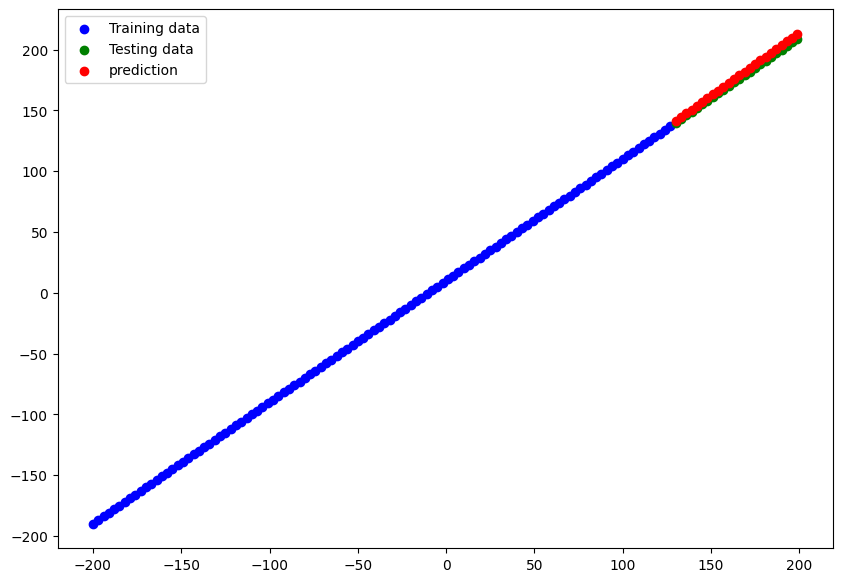

In [ ]:
plot_prediction(train_data=x_train_inter,
                train_labels=y_train_inter,
                test_data=x_test_inter,
                test_labels=y_test_inter,
                predictions=y_pred_inter)


### just for fun lets solve one python problem

**rotate the list**

* you have value of rotation `k=3`

**input -** [1,2,3,4,5,6,7]

**output should be -** [5,6,7,1,2,3,4]



In [ ]:
lst = [1, 2, 3, 4, 5, 6, 7]

In [ ]:
k = int(input())

for i in range(k):
  rotate_val = lst[-1]
  lst.pop(-1)
  lst.insert(0, rotate_val)

print(lst)


5
[5, 6, 7, 1, 2, 3, 4]


In [ ]:
lst

[3, 4, 5, 6, 7, 1, 2]

In [ ]:
k = 5
lst_element = lst[-k:]
first_element = lst[:-k]
final_lst = lst_element + first_element
final_lst

[5, 6, 7, 1, 2, 3, 4]

### Just to revise tensor with basic neural network model.

* first create a simple data with tensorflow.
* split data with train and test data set
* let build a model
*  predict model

In [ ]:
# !pip install -U scikit-learn

import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
x = tf.range(-200, 200, 4)
y = x+10
x, y

(<tf.Tensor: shape=(100,), dtype=int32, numpy=
 array([-200, -196, -192, -188, -184, -180, -176, -172, -168, -164, -160,
        -156, -152, -148, -144, -140, -136, -132, -128, -124, -120, -116,
        -112, -108, -104, -100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,
         -68,  -64,  -60,  -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,
         -24,  -20,  -16,  -12,   -8,   -4,    0,    4,    8,   12,   16,
          20,   24,   28,   32,   36,   40,   44,   48,   52,   56,   60,
          64,   68,   72,   76,   80,   84,   88,   92,   96,  100,  104,
         108,  112,  116,  120,  124,  128,  132,  136,  140,  144,  148,
         152,  156,  160,  164,  168,  172,  176,  180,  184,  188,  192,
         196], dtype=int32)>,
 <tf.Tensor: shape=(100,), dtype=int32, numpy=
 array([-190, -186, -182, -178, -174, -170, -166, -162, -158, -154, -150,
        -146, -142, -138, -134, -130, -126, -122, -118, -114, -110, -106,
        -102,  -98,  -94,  -90,  -86,  -82,  -78,  -74,  -70, 

In [ ]:
x_train = x[:75]
x_test = x[75:]

y_train = y[:75]
y_test = y[75:]

x_train, x_test, y_train, y_test

(<tf.Tensor: shape=(75,), dtype=int32, numpy=
 array([-200, -196, -192, -188, -184, -180, -176, -172, -168, -164, -160,
        -156, -152, -148, -144, -140, -136, -132, -128, -124, -120, -116,
        -112, -108, -104, -100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,
         -68,  -64,  -60,  -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,
         -24,  -20,  -16,  -12,   -8,   -4,    0,    4,    8,   12,   16,
          20,   24,   28,   32,   36,   40,   44,   48,   52,   56,   60,
          64,   68,   72,   76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(25,), dtype=int32, numpy=
 array([100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148,
        152, 156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196],
       dtype=int32)>,
 <tf.Tensor: shape=(75,), dtype=int32, numpy=
 array([-190, -186, -182, -178, -174, -170, -166, -162, -158, -154, -150,
        -146, -142, -138, -134, -130, -126, -122, -118, -114, -110, -106,
        -102,  -98,  -94,  -

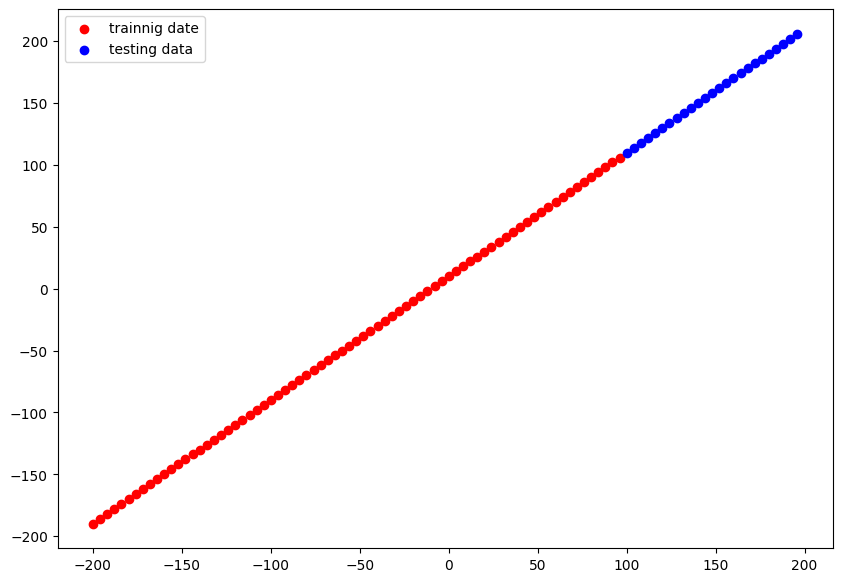

In [ ]:
# plotting a data for visualing

plt.figure(figsize=[10, 7])
plt.scatter(x_train, y_train, c="r", label="trainnig date")
plt.scatter(x_test, y_test, c="b", label="testing data")
plt.legend()

In [ ]:
# Creating a model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(x_train, y_train, epochs=50)


Epoch 1/50
3/3 [==============================] - 0s 5ms/step - loss: 39.5207 - mae: 39.5207
Epoch 2/50
3/3 [==============================] - 0s 4ms/step - loss: 33.7959 - mae: 33.7959
Epoch 3/50
3/3 [==============================] - 0s 5ms/step - loss: 36.0952 - mae: 36.0952
Epoch 4/50
3/3 [==============================] - 0s 5ms/step - loss: 31.1263 - mae: 31.1263
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 41.8739 - mae: 41.8739
Epoch 6/50
3/3 [==============================] - 0s 5ms/step - loss: 45.9834 - mae: 45.9834
Epoch 7/50
3/3 [==============================] - 0s 4ms/step - loss: 32.6254 - mae: 32.6254
Epoch 8/50
3/3 [==============================] - 0s 5ms/step - loss: 33.4269 - mae: 33.4269
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: 35.2572 - mae: 35.2572
Epoch 10/50
3/3 [==============================] - 0s 5ms/step - loss: 38.4044 - mae: 38.4044
Epoch 11/50
3/3 [==============================] - 0s 7ms/step - loss

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred = model.predict(x_test)
y_pred, x_test

1/1 [==============================] - 0s 49ms/step


(array([[130.94514],
        [136.16728],
        [141.3894 ],
        [146.61154],
        [151.83368],
        [157.05582],
        [162.27794],
        [167.50008],
        [172.72221],
        [177.94434],
        [183.16647],
        [188.38861],
        [193.61075],
        [198.83287],
        [204.05501],
        [209.27715],
        [214.49927],
        [219.7214 ],
        [224.94354],
        [230.16568],
        [235.3878 ],
        [240.60994],
        [245.83208],
        [251.0542 ],
        [256.27634]], dtype=float32),
 <tf.Tensor: shape=(25,), dtype=int32, numpy=
 array([100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148,
        152, 156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196],
       dtype=int32)>)

In [ ]:
y_test

<tf.Tensor: shape=(25,), dtype=int32, numpy=
array([110, 114, 118, 122, 126, 130, 134, 138, 142, 146, 150, 154, 158,
       162, 166, 170, 174, 178, 182, 186, 190, 194, 198, 202, 206],
      dtype=int32)>

In [ ]:
x = tf.range(-100, 200)
y = x + 24
x, y

(<tf.Tensor: shape=(300,), dtype=int32, numpy=
 array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
         -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
         -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
         -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
         -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
         -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
         -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
         -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
         -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
          -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
          10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
          21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
          32,   33,   34,   35,   36,   37,   38,   39,   40,   4

In [ ]:
x_train = x[:260]
y_train = y[:260]

x_test = x[260:]
y_test = y[260:]

x_train, y_train, x_test, y_test

(<tf.Tensor: shape=(260,), dtype=int32, numpy=
 array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
         -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
         -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
         -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
         -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
         -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
         -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
         -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
         -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
          -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
          10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
          21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
          32,   33,   34,   35,   36,   37,   38,   39,   40,   4

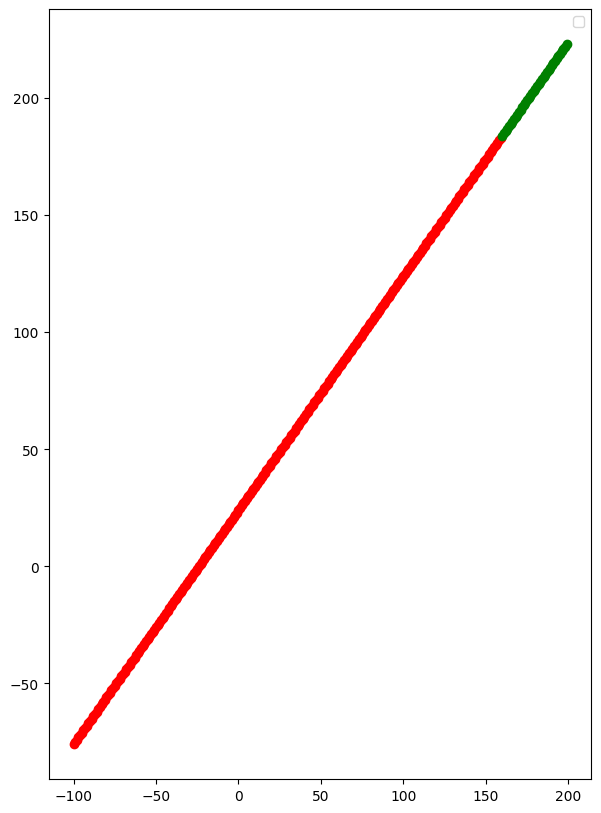

In [ ]:
# plot the graph to check how data looks likes

plt.figure(figsize=(7, 10))

plt.scatter(x_train, y_train, c="r")
plt.scatter(x_test, y_test, c="g")

plt.legend()

In [ ]:
# create a model
model = tf.keras.Sequential([
    tf.keras.Input(shape=1),
    tf.keras.layers.Dense(50)
])

# build the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 2ms/step - loss: 71.7704 - mae: 71.7704
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 64.0472 - mae: 64.0472
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 56.8072 - mae: 56.8072
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 49.8435 - mae: 49.8435
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 43.3594 - mae: 43.3594
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 38.7913 - mae: 38.7913
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 34.8042 - mae: 34.8042
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 31.8499 - mae: 31.8499
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 29.6724 - mae: 29.6724
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 27.6546 - mae: 27.6546
Epoch 11/100
9/9 [==============================] - 0s 2ms/

In [ ]:
y_pred = model.predict(x_test)
y_pred, x_test

2/2 [==============================] - 0s 7ms/step


(array([[188.6869 , 190.69754, 190.72972, ..., 190.6968 , 188.68076,
         190.69402],
        [189.86528, 191.8885 , 191.92088, ..., 191.88776, 189.85912,
         191.88495],
        [191.04367, 193.07947, 193.11205, ..., 193.07874, 191.03749,
         193.07588],
        ...,
        [232.2872 , 234.763  , 234.8026 , ..., 234.76253, 232.28044,
         234.75842],
        [233.46559, 235.95395, 235.99376, ..., 235.95349, 233.45882,
         235.94936],
        [234.64398, 237.14491, 237.1849 , ..., 237.14445, 234.63719,
         237.14029]], dtype=float32),
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
        186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
        199], dtype=int32)>)